Assignment visualization 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  

# read the data in raw form
pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case = True, regex = True)]


# check if there are null data types
pumpkins.isnull().sum()

# drop the null data columns
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns],axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month 

# created a new dataframe with the new columns 
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 +1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

print(new_pumpkins)

      Month               Package  Low Price  High Price  Price
70        9  1 1/9 bushel cartons      15.00        15.0  13.50
71        9  1 1/9 bushel cartons      18.00        18.0  16.20
72       10  1 1/9 bushel cartons      18.00        18.0  16.20
73       10  1 1/9 bushel cartons      17.00        17.0  15.30
74       10  1 1/9 bushel cartons      15.00        15.0  13.50
...     ...                   ...        ...         ...    ...
1738      9    1/2 bushel cartons      15.00        15.0  30.00
1739      9    1/2 bushel cartons      13.75        15.0  28.75
1740      9    1/2 bushel cartons      10.75        15.0  25.75
1741      9    1/2 bushel cartons      12.00        12.0  24.00
1742      9    1/2 bushel cartons      12.00        12.0  24.00

[415 rows x 5 columns]


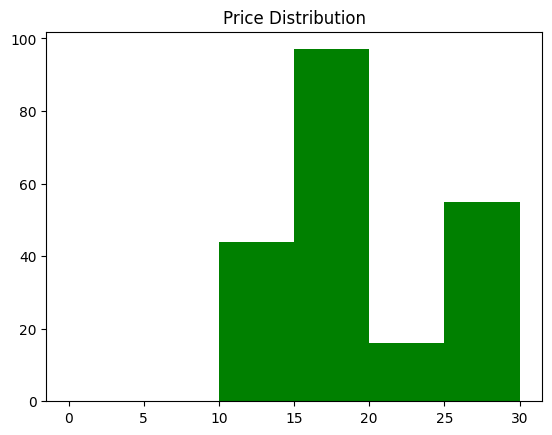

In [12]:
price = new_pumpkins.Price
month = new_pumpkins.Month

plt.hist(price, bins = [0, 5, 10, 15, 20, 25, 30], color = 'green')
plt.title('Price Distribution')
plt.show()